# INFO 6105 - Data Science Engineering Methods and Tools (34274)

# Daily News Classifier

#  By Team 23 -
  Aditya Kulkarni (NUID: 001001395)
  Mohammed Saqlain Kazi (NUID: 001023485)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
root="ProcessedData.tsv"
dataset =  pd.read_csv(root, sep='\t',encoding = 'utf-8')

In [3]:
dataset.head()

,NewCategory,title,author,published_date,updated_on,slug,blurb,body
0,Business & Finance,Bitcoin is down 60 percent this year. Here's w...,Timothy B. Lee,3/31/2014 14:01,12/16/2014 16:37,http://www.vox.com/2014/3/31/5557170/bitcoin-b...,Bitcoins have lost more than 60 percent of the...,The markets haven't been kind to Bitcoin in 20...
1,Crime,6 health problems marijuana could treat better...,German Lopez,3/31/2014 15:44,11/17/2014 0:20,http://www.vox.com/2014/3/31/5557700/six-probl...,Medical marijuana could fill gaps that current...,Twenty states have so far legalized the medica...
2,Business & Finance,9 charts that explain the history of global we...,Matthew Yglesias,4/10/2014 13:30,12/16/2014 15:47,http://www.vox.com/2014/4/10/5561608/9-charts-...,These nine charts from Thomas Piketty's new bo...,Thomas Piketty's book Capital in the 21st Cent...
3,Crime,Remember when legal marijuana was going to sen...,German Lopez,4/3/2014 23:25,5/6/2014 21:58,http://www.vox.com/2014/4/3/5563134/marijuana-...,"Three months after legalizing marijuana, Denve...",When Colorado legalized recreational marijuana...
4,Technology & Health,Obamacare succeeded for one simple reason: it'...,Sarah Kliff,4/1/2014 20:26,11/18/2014 15:09,http://www.vox.com/2014/4/1/5570780/the-two-re...,"After a catastrophic launch, Obamacare still s...",There's a very simple reason that Obamacare hi...


In [4]:
# Removing NaN values

ds_cleaned = dataset.dropna(subset = ['title', 'NewCategory','blurb','body','author'])
print(ds_cleaned.shape)

# Resetting the index
ds_cleaned.reset_index(drop = True, inplace = True)

body = ds_cleaned['body']
title = ds_cleaned['title']
category = ds_cleaned['NewCategory']
blurb = ds_cleaned['blurb']
author = ds_cleaned['author']

print("Body row count: ", len(body))
print("Title row count: ", len(title))
print("Category row count: ", len(category))
print("Blurb row count: ", len(blurb))
print("Author row count: ", len(author))

(11681, 8)
Body row count:  11681
Title row count:  11681
Category row count:  11681
Blurb row count:  11681
Author row count:  11681


In [5]:
# Removing non ascii characters

from bs4 import BeautifulSoup

# Defining a function
def non_ascii_removal(string):
    return ''.join([i if ord(i) < 128 else ' ' for i in string])

In [6]:
ds_body=[]
ds_title=[]
ds_blurb=[]
ds_NewCategory=[]
ds_author=[]

for i in range(0,len(body)):
    if isinstance(body[i],str):
        soup = BeautifulSoup(body[i])
        text = soup.get_text()
        cleanedText = text.replace(r'\n',"")
        data = non_ascii_removal(cleanedText)
        ds_body.append(data)
       
        cleanedTitle=non_ascii_removal(title[i])
        ds_title.append(cleanedTitle)
        
        cleaned_blurb=non_ascii_removal(blurb[i])
        ds_blurb.append(cleaned_blurb)
        
        cleaned_NewCategory=non_ascii_removal(category[i])  
        ds_NewCategory.append(cleaned_NewCategory)
        
        cleaned_author=non_ascii_removal(author[i])  
        ds_author.append(cleaned_author)
    else:
        print(i,':',)
        print(i,':',body[i])
        ds_body.append('')

print('done')

done


In [7]:
print("Body row count: ", len(ds_body))
print("Title row count: ", len(ds_title))
print("NewCategory row count: ", len(ds_NewCategory))
print("Blurb row count: ", len(ds_blurb))
print("Author row count: ", len(ds_author))

Body row count:  11681
Title row count:  11681
NewCategory row count:  11681
Blurb row count:  11681
Author row count:  11681


# Cleaned dataset

In [8]:
# Generating cleaned dataset csv

ds_cleaned.loc[:, ('body')] = ds_body
ds_cleaned.loc[:, ('title')] = ds_title
ds_cleaned.loc[:, ('blurb')] = ds_blurb
ds_cleaned.loc[:, ('NewCategory')] = ds_NewCategory
ds_cleaned.loc[:, ('author')] = ds_author
ds_cleaned.head()

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,NewCategory,title,author,published_date,updated_on,slug,blurb,body
0,Business & Finance,Bitcoin is down 60 percent this year. Here's w...,Timothy B. Lee,3/31/2014 14:01,12/16/2014 16:37,http://www.vox.com/2014/3/31/5557170/bitcoin-b...,Bitcoins have lost more than 60 percent of the...,The markets haven't been kind to Bitcoin in 20...
1,Crime,6 health problems marijuana could treat better...,German Lopez,3/31/2014 15:44,11/17/2014 0:20,http://www.vox.com/2014/3/31/5557700/six-probl...,Medical marijuana could fill gaps that current...,Twenty states have so far legalized the medica...
2,Business & Finance,9 charts that explain the history of global we...,Matthew Yglesias,4/10/2014 13:30,12/16/2014 15:47,http://www.vox.com/2014/4/10/5561608/9-charts-...,These nine charts from Thomas Piketty's new bo...,Thomas Piketty's book Capital in the 21st Cent...
3,Crime,Remember when legal marijuana was going to sen...,German Lopez,4/3/2014 23:25,5/6/2014 21:58,http://www.vox.com/2014/4/3/5563134/marijuana-...,"Three months after legalizing marijuana, Denve...",When Colorado legalized recreational marijuana...
4,Technology & Health,Obamacare succeeded for one simple reason: it'...,Sarah Kliff,4/1/2014 20:26,11/18/2014 15:09,http://www.vox.com/2014/4/1/5570780/the-two-re...,"After a catastrophic launch, Obamacare still s...",There's a very simple reason that Obamacare hi...


In [9]:
print(ds_cleaned.shape)

(11681, 8)


# Data Visualization

(-1.1266212761542844,
 1.1219829509237411,
 -1.1288392442453323,
 1.1279357664693854)

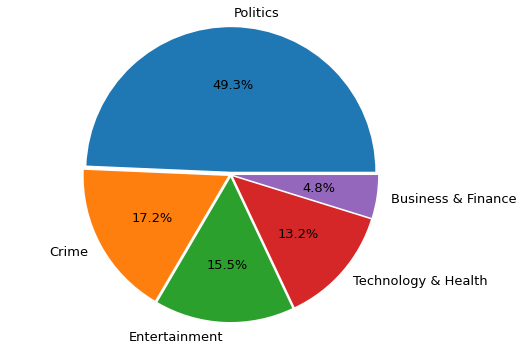

In [10]:
explode = (0.02,0.02,0.02,0.02,0.02)
dataset.NewCategory.value_counts().plot(kind='pie', 
                                  figsize=(8,6), 
                                  fontsize=13, 
                                  autopct='%1.1f%%', 
                                  wedgeprops={'linewidth':5},
                                   explode=explode
                                  )
plt.axis('off')
plt.axis('equal')

Text(0, 0.5, 'Count')

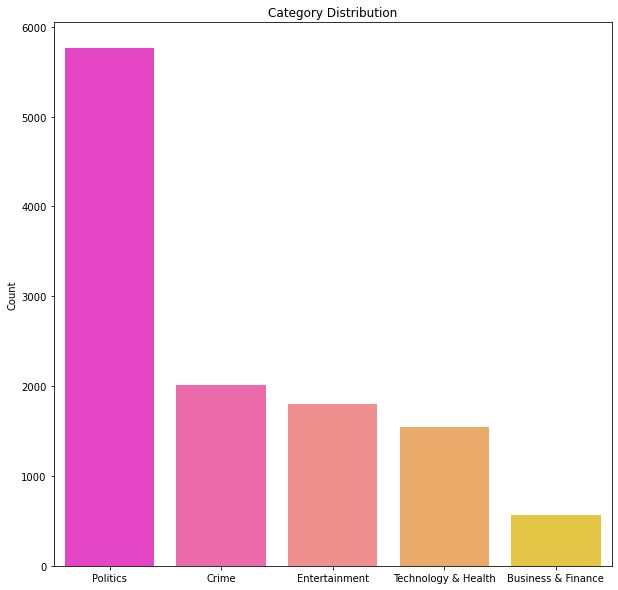

In [11]:
#Category Term Distribution
plt.figure(figsize=(10, 10))
sns.barplot(y=dataset.NewCategory.value_counts()[:10], x=dataset.NewCategory.value_counts().index, palette='spring')
plt.xticks(rotation=0)
plt.title("Category Distribution")
plt.ylabel("Count")


# Multinomial Naïve Bayes Theorem

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
dataset['title'] = dataset['title'].str.replace('[^\w\s]','').str.lower() # unpunctuate and lower case
dataset['NewCategory'] = dataset['NewCategory'].str.replace('[^\w\s]','').str.lower() # unpunctuate and lower case

In [14]:
# convert data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataset['title'])

y = dataset['NewCategory']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [16]:
# fit and score the Multinomial Naive Bayes classifier
mnb = MultinomialNB(alpha=0.96)
mnb.fit(X_train, y_train)

# mnb.score(X_test, y_test)

MultinomialNB(alpha=0.96)

In [17]:
y_pred = mnb.predict(X_test)

In [18]:
#Finding the accuracy of Model
from sklearn.metrics import accuracy_score 
acc = accuracy_score(y_test, y_pred)
print("Accuracy of Multinomial Naive Bayes model:", acc*100)

Accuracy of Multinomial Naive Bayes model: 74.00855920114122


In [19]:
# Hyperparameter Tuning
mnb = MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)
mnb.fit(X_train, y_train)

MultinomialNB(alpha=0.5)

In [20]:
y_pred = mnb.predict(X_test)

In [21]:
# Performance Metric

In [22]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy of Multinomial Naive Bayes model:", acc*100)

Accuracy of Multinomial Naive Bayes model: 74.66476462196862


In [23]:
from sklearn.metrics import f1_score
print("F1 Score for all the categories:")
f1_score(y_test, y_pred, average=None)

F1 Score for all the categories:


array([0.29962547, 0.69950739, 0.67901235, 0.84074282, 0.65465465])

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[  40,   12,   18,   55,   33],
       [   9,  426,   25,  112,   23],
       [  21,   36,  330,   85,   49],
       [  22,  113,   35, 1494,   70],
       [  17,   36,   43,   74,  327]])

In [25]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

 business  finance       0.37      0.25      0.30       158
             crime       0.68      0.72      0.70       595
     entertainment       0.73      0.63      0.68       521
          politics       0.82      0.86      0.84      1734
technology  health       0.65      0.66      0.65       497

          accuracy                           0.75      3505
         macro avg       0.65      0.62      0.63      3505
      weighted avg       0.74      0.75      0.74      3505



In [26]:
df11 = pd.DataFrame(report).transpose()
df11

,precision,recall,f1-score,support
business finance,0.366972,0.253165,0.299625,158.000000
crime,0.683788,0.715966,0.699507,595.000000
entertainment,0.731707,0.633397,0.679012,521.000000
politics,0.820879,0.861592,0.840743,1734.000000
technology health,0.651394,0.657948,0.654655,497.000000
accuracy,0.746648,0.746648,0.746648,0.746648
macro avg,0.650948,0.624414,0.634709,3505.000000
weighted avg,0.739858,0.746648,0.741947,3505.000000


<AxesSubplot:>

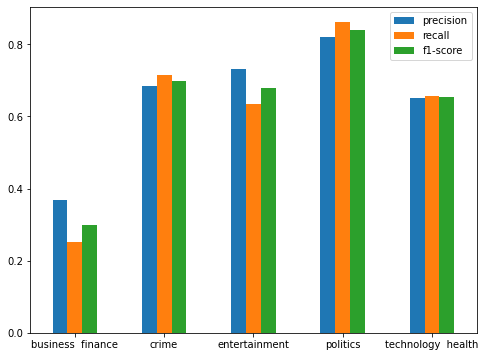

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
bb= ['precision','recall','f1-score']
# a simple line plot
df11.iloc[0:5].plot(kind='bar',y= bb,figsize=(8,6),rot=0)

In [28]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Greens')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

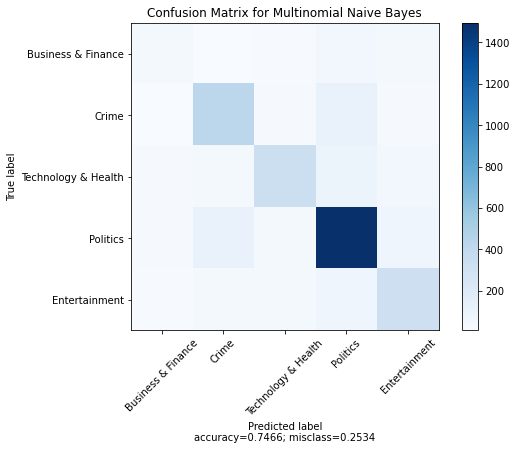

In [29]:
plot_confusion_matrix(cm           = confusion_matrix, 
                                     normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for Multinomial Naive Bayes")

# Gaussian Naïve Bayes Classifier

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataset['title'])

y = dataset['NewCategory']
gnb = GaussianNB()
t = X_train.toarray()
gnb.fit(t, y_train)


GaussianNB()

In [31]:
y_pred = mnb.predict(X_test)

In [32]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy of Gaussian Naive Bayes model:", acc*100)

Accuracy of Gaussian Naive Bayes model: 74.66476462196862


In [33]:
from sklearn.metrics import f1_score
print("F1 Score for all the categories:")
f1_score(y_test, y_pred, average=None)

F1 Score for all the categories:


array([0.29962547, 0.69950739, 0.67901235, 0.84074282, 0.65465465])

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = confusion_matrix(y_test, y_pred)
confusion_matrix1

array([[  40,   12,   18,   55,   33],
       [   9,  426,   25,  112,   23],
       [  21,   36,  330,   85,   49],
       [  22,  113,   35, 1494,   70],
       [  17,   36,   43,   74,  327]])

In [35]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

 business  finance       0.37      0.25      0.30       158
             crime       0.68      0.72      0.70       595
     entertainment       0.73      0.63      0.68       521
          politics       0.82      0.86      0.84      1734
technology  health       0.65      0.66      0.65       497

          accuracy                           0.75      3505
         macro avg       0.65      0.62      0.63      3505
      weighted avg       0.74      0.75      0.74      3505



In [36]:
df12 = pd.DataFrame(report).transpose()
df12

,precision,recall,f1-score,support
business finance,0.366972,0.253165,0.299625,158.000000
crime,0.683788,0.715966,0.699507,595.000000
entertainment,0.731707,0.633397,0.679012,521.000000
politics,0.820879,0.861592,0.840743,1734.000000
technology health,0.651394,0.657948,0.654655,497.000000
accuracy,0.746648,0.746648,0.746648,0.746648
macro avg,0.650948,0.624414,0.634709,3505.000000
weighted avg,0.739858,0.746648,0.741947,3505.000000


<AxesSubplot:>

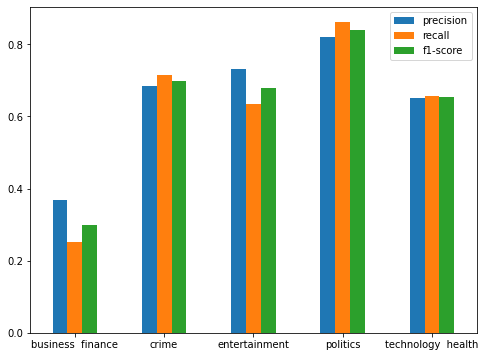

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
cc= ['precision','recall','f1-score']
# a simple line plot
df12.iloc[0:5].plot(kind='bar',y= cc,figsize=(8,6),rot=0)

In [38]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix1',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

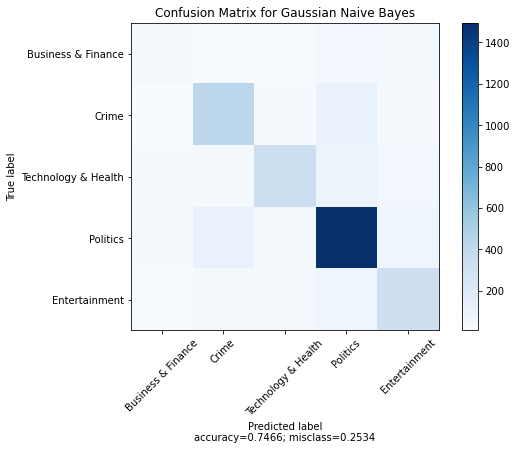

In [39]:
plot_confusion_matrix(cm           = confusion_matrix1, 
                                     normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for Gaussian Naive Bayes")

# Random Forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classifier = RandomForestClassifier(n_estimators=100, random_state=42)  
clf = classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)

In [41]:
scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv=5)

In [42]:
scores.mean()

0.7353874969157264

In [43]:
# Hyperparameter Tuning

In [44]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=33)  
clf = classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Performance Metric

In [45]:
from sklearn.metrics import accuracy_score 
acc = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest model:", acc*100)

Accuracy of Random Forest model: 74.26533523537803


In [46]:
from sklearn.metrics import f1_score
print("F1 Score for all the categories:")
f1_score(y_test, y_pred, average=None)

F1 Score for all the categories:


array([0.24657534, 0.71771218, 0.67833698, 0.81626351, 0.64167585])

In [47]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test, y_pred)
confusion_matrix2

array([[  27,    4,   14,   99,   14],
       [   2,  389,   25,  171,    8],
       [  13,   18,  310,  135,   45],
       [  13,   64,   19, 1586,   52],
       [   6,   14,   25,  161,  291]])

In [48]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

 business  finance       0.44      0.17      0.25       158
             crime       0.80      0.65      0.72       595
     entertainment       0.79      0.60      0.68       521
          politics       0.74      0.91      0.82      1734
technology  health       0.71      0.59      0.64       497

          accuracy                           0.74      3505
         macro avg       0.69      0.58      0.62      3505
      weighted avg       0.74      0.74      0.73      3505



In [49]:
df13 = pd.DataFrame(report).transpose()
df13

,precision,recall,f1-score,support
business finance,0.442623,0.170886,0.246575,158.000000
crime,0.795501,0.653782,0.717712,595.000000
entertainment,0.788804,0.595010,0.678337,521.000000
politics,0.736989,0.914648,0.816264,1734.000000
technology health,0.709756,0.585513,0.641676,497.000000
accuracy,0.742653,0.742653,0.742653,0.742653
macro avg,0.694735,0.583968,0.620113,3505.000000
weighted avg,0.737493,0.742653,0.728595,3505.000000


<AxesSubplot:>

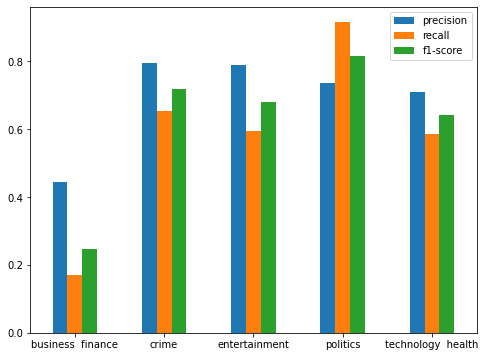

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
dd= ['precision','recall','f1-score']
# a simple line plot
df13.iloc[0:5].plot(kind='bar',y= bb,figsize=(8,6),rot=0)

In [51]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Reds')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

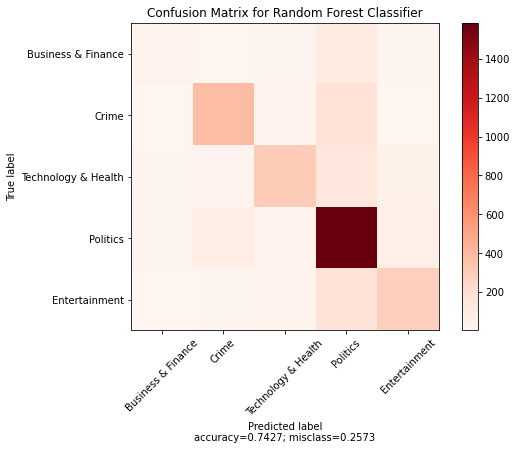

In [52]:
plot_confusion_matrix(cm           =confusion_matrix2, 
                                    normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for Random Forest Classifier")

# K-Nearest Neighbours Classifier

In [53]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=2)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [54]:
y_pred = classifier.predict(X_test)

In [55]:
from sklearn.metrics import accuracy_score 
acc = accuracy_score(y_test, y_pred)
print(acc)

0.6039942938659059


In [56]:
classifier = KNeighborsClassifier(n_neighbors=59)  
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=59)

In [57]:
y_pred = classifier.predict(X_test)

Performance Metrics

In [58]:
from sklearn.metrics import accuracy_score 
acc = accuracy_score(y_test, y_pred)
print("Accuracy of KNN Classifier after tuning:", acc*100)

Accuracy of KNN Classifier after tuning: 57.48930099857347


In [59]:
from sklearn.metrics import f1_score
print("F1 Score for all the categories:")
b= f1_score(y_test, y_pred, average=None)
b

F1 Score for all the categories:


array([0.        , 0.1314554 , 0.49148418, 0.70745458, 0.25581395])

In [60]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(y_test, y_pred)
m

array([[   0,    0,   11,  145,    2],
       [   0,   42,   32,  517,    4],
       [   0,    0,  202,  315,    4],
       [   0,    2,   20, 1694,   18],
       [   0,    0,   36,  384,   77]])

In [61]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test, y_pred))

                    precision    recall  f1-score   support

 business  finance       0.00      0.00      0.00       158
             crime       0.95      0.07      0.13       595
     entertainment       0.67      0.39      0.49       521
          politics       0.55      0.98      0.71      1734
technology  health       0.73      0.15      0.26       497

          accuracy                           0.57      3505
         macro avg       0.58      0.32      0.32      3505
      weighted avg       0.64      0.57      0.48      3505



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
df14 = pd.DataFrame(report).transpose()
df14

,precision,recall,f1-score,support
business finance,0.000000,0.000000,0.000000,158.000000
crime,0.954545,0.070588,0.131455,595.000000
entertainment,0.671096,0.387716,0.491484,521.000000
politics,0.554501,0.976932,0.707455,1734.000000
technology health,0.733333,0.154930,0.255814,497.000000
accuracy,0.574893,0.574893,0.574893,0.574893
macro avg,0.582695,0.318033,0.317242,3505.000000
weighted avg,0.640105,0.574893,0.481639,3505.000000


<AxesSubplot:>

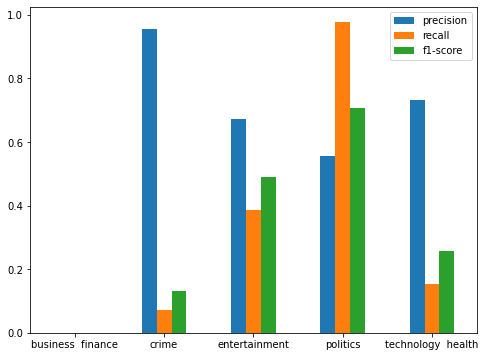

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
ee= ['precision','recall','f1-score']
# a simple line plot
df14.iloc[0:5].plot(kind='bar',y= ee,figsize=(8,6),rot=0)

In [64]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('coolwarm')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

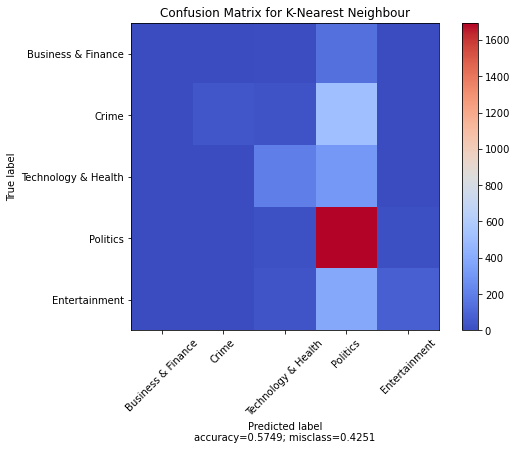

In [65]:
plot_confusion_matrix(cm           =m, 
                                     normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for K-Nearest Neighbour")

# Stochastic Gradient Descent

In [66]:
sgd = SGDClassifier(n_jobs=-1, penalty='l2', max_iter= 1000, random_state=1234)

# hyperparameters for tuning
sgd_grid = [{'loss': ['hinge', 'log', 'squared_hinge'],
             'alpha': [0.0001, 0.0001, 0.00001]}]

# grid search with cross validation
sgd_search = GridSearchCV(estimator=sgd, param_grid=sgd_grid, cv=10, refit=True)
sgd_search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


GridSearchCV(cv=10, estimator=SGDClassifier(n_jobs=-1, random_state=1234),
             param_grid=[{'alpha': [0.0001, 0.0001, 1e-05],
                          'loss': ['hinge', 'log', 'squared_hinge']}])

In [67]:
y_pred = sgd_search.predict(X_test)

In [68]:
sgd_search.best_estimator_.score(X_test, y_test)

0.7583452211126962

Performance Metric

In [69]:
print("Accuracy of SGD Classifier model:", sgd_search.best_estimator_.score(X_test, y_test)*100)

Accuracy of SGD Classifier model: 75.83452211126962


In [70]:
from sklearn.metrics import f1_score
print("F1 Score for all the categories:")
f1_score(y_test, y_pred, average=None)

F1 Score for all the categories:


array([0.33064516, 0.72527473, 0.67947422, 0.84551952, 0.65966387])

In [71]:
from sklearn.metrics import confusion_matrix
o = confusion_matrix(y_test, y_pred)
o

array([[  41,   11,   22,   63,   21],
       [   4,  429,   32,  112,   18],
       [  15,   35,  336,   92,   43],
       [  19,   87,   31, 1538,   59],
       [  11,   26,   47,   99,  314]])

In [72]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred,output_dict=True)
print(classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

 business  finance       0.46      0.26      0.33       158
             crime       0.73      0.72      0.73       595
     entertainment       0.72      0.64      0.68       521
          politics       0.81      0.89      0.85      1734
technology  health       0.69      0.63      0.66       497

          accuracy                           0.76      3505
         macro avg       0.68      0.63      0.65      3505
      weighted avg       0.75      0.76      0.75      3505



In [73]:
df15 = pd.DataFrame(report).transpose()
df15

,precision,recall,f1-score,support
business finance,0.455556,0.259494,0.330645,158.000000
crime,0.729592,0.721008,0.725275,595.000000
entertainment,0.717949,0.644914,0.679474,521.000000
politics,0.807773,0.886967,0.845520,1734.000000
technology health,0.690110,0.631791,0.659664,497.000000
accuracy,0.758345,0.758345,0.758345,0.758345
macro avg,0.680196,0.628835,0.648115,3505.000000
weighted avg,0.748588,0.758345,0.750862,3505.000000


<AxesSubplot:>

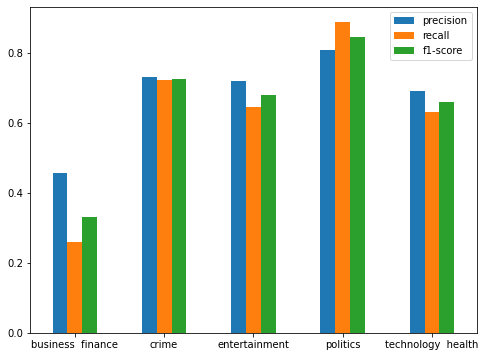

In [74]:
import matplotlib.pyplot as plt
import pandas as pd
ff= ['precision','recall','f1-score']
# a simple line plot
df15.iloc[0:5].plot(kind='bar',y= ff,figsize=(8,6),rot=0)

In [75]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('autumn')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

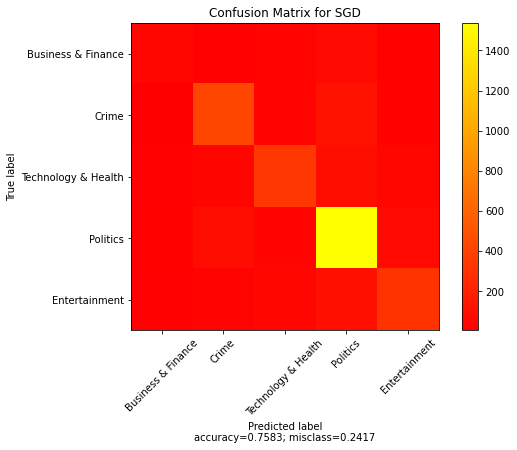

In [76]:
plot_confusion_matrix(cm           = o, 
                                    normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for SGD")

# Support Vector Machine

In [77]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Using different SVM Models

In [78]:
clf_svm = svm.LinearSVC()
clf_svm.fit(X_train, y_train)
predicted = clf_svm.predict(X_test)

In [79]:
print("Accuracy of SVM model:", accuracy_score(y_test, predicted)*100)

Accuracy of SVM model: 74.4972186563971


In [80]:
lin_y_pred = clf_svm.predict(X_test)

In [81]:
from sklearn.metrics import f1_score
print("F1 Score for all the categories:")
f1_score(y_test, lin_y_pred, average=None)

F1 Score for all the categories:


array([0.40837696, 0.69651741, 0.64946889, 0.84418312, 0.63536776])

In [82]:
from sklearn.metrics import confusion_matrix
q = confusion_matrix(y_test, lin_y_pred)
q

array([[  39,    5,   14,   26,   20],
       [   5,  280,   33,   75,   19],
       [  14,   20,  214,   55,   35],
       [  18,   67,   31, 1005,   43],
       [  11,   20,   29,   56,  203]])

In [83]:
from sklearn.metrics import classification_report
report1 = classification_report(y_test,lin_y_pred,output_dict=True)
print(classification_report(y_test, lin_y_pred))

                    precision    recall  f1-score   support

 business  finance       0.45      0.38      0.41       104
             crime       0.71      0.68      0.70       412
     entertainment       0.67      0.63      0.65       338
          politics       0.83      0.86      0.84      1164
technology  health       0.63      0.64      0.64       319

          accuracy                           0.74      2337
         macro avg       0.66      0.64      0.65      2337
      weighted avg       0.74      0.74      0.74      2337



In [84]:
df21 = pd.DataFrame(report1).transpose()
df21

,precision,recall,f1-score,support
business finance,0.448276,0.375000,0.408377,104.000000
crime,0.714286,0.679612,0.696517,412.000000
entertainment,0.666667,0.633136,0.649469,338.000000
politics,0.825801,0.863402,0.844183,1164.000000
technology health,0.634375,0.636364,0.635368,319.000000
accuracy,0.744972,0.744972,0.744972,0.744972
macro avg,0.657881,0.637503,0.646783,2337.000000
weighted avg,0.740196,0.744972,0.742092,2337.000000


In [85]:
C = 1.0
clf_svm1 = svm.SVC(kernel='rbf', gamma=0.7, C=C)
clf_svm1.fit(X_train, y_train)
predicted1 = clf_svm1.predict(X_test)

In [86]:
print("Accuracy of SVM model:", accuracy_score(y_test, predicted1)*100)

Accuracy of SVM model: 50.492083868207104


In [87]:
lin_y_pred1 = clf_svm1.predict(X_test)

In [88]:
 s = confusion_matrix(y_test, lin_y_pred1)
s

array([[   0,    0,    0,  103,    1],
       [   0,    1,    0,  411,    0],
       [   0,    0,    8,  325,    5],
       [   0,    0,    1, 1161,    2],
       [   0,    0,    0,  309,   10]])

In [89]:
from sklearn.metrics import classification_report
report2 = classification_report(y_test,lin_y_pred1,output_dict=True)
print(classification_report(y_test, lin_y_pred1))

                    precision    recall  f1-score   support

 business  finance       0.00      0.00      0.00       104
             crime       1.00      0.00      0.00       412
     entertainment       0.89      0.02      0.05       338
          politics       0.50      1.00      0.67      1164
technology  health       0.56      0.03      0.06       319

          accuracy                           0.50      2337
         macro avg       0.59      0.21      0.16      2337
      weighted avg       0.63      0.50      0.35      2337



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
df22 = pd.DataFrame(report2).transpose()
df22

,precision,recall,f1-score,support
business finance,0.000000,0.000000,0.000000,104.000000
crime,1.000000,0.002427,0.004843,412.000000
entertainment,0.888889,0.023669,0.046110,338.000000
politics,0.502815,0.997423,0.668586,1164.000000
technology health,0.555556,0.031348,0.059347,319.000000
accuracy,0.504921,0.504921,0.504921,0.504921
macro avg,0.589452,0.210973,0.155777,2337.000000
weighted avg,0.631127,0.504921,0.348629,2337.000000


In [91]:
clf_svm2 = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)
clf_svm2.fit(X_train, y_train)
predicted2 = clf_svm2.predict(X_test)

In [92]:
print("Accuracy of SVM model:", accuracy_score(y_test, predicted2)*100)

Accuracy of SVM model: 49.80744544287548


In [93]:
lin_y_pred2 = clf_svm2.predict(X_test)

In [94]:
t = confusion_matrix(y_test, lin_y_pred2)
t

array([[   0,    0,    0,  104,    0],
       [   0,    0,    0,  412,    0],
       [   0,    0,    0,  338,    0],
       [   0,    0,    0, 1164,    0],
       [   0,    0,    0,  319,    0]])

In [95]:
from sklearn.metrics import classification_report
report3 = classification_report(y_test,lin_y_pred2,output_dict=True)
print(classification_report(y_test, lin_y_pred2))

                    precision    recall  f1-score   support

 business  finance       0.00      0.00      0.00       104
             crime       0.00      0.00      0.00       412
     entertainment       0.00      0.00      0.00       338
          politics       0.50      1.00      0.66      1164
technology  health       0.00      0.00      0.00       319

          accuracy                           0.50      2337
         macro avg       0.10      0.20      0.13      2337
      weighted avg       0.25      0.50      0.33      2337



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
df23 = pd.DataFrame(report3).transpose()
df23

,precision,recall,f1-score,support
business finance,0.000000,0.000000,0.000000,104.000000
crime,0.000000,0.000000,0.000000,412.000000
entertainment,0.000000,0.000000,0.000000,338.000000
politics,0.498074,1.000000,0.664953,1164.000000
technology health,0.000000,0.000000,0.000000,319.000000
accuracy,0.498074,0.498074,0.498074,0.498074
macro avg,0.099615,0.200000,0.132991,2337.000000
weighted avg,0.248078,0.498074,0.331196,2337.000000


<AxesSubplot:>

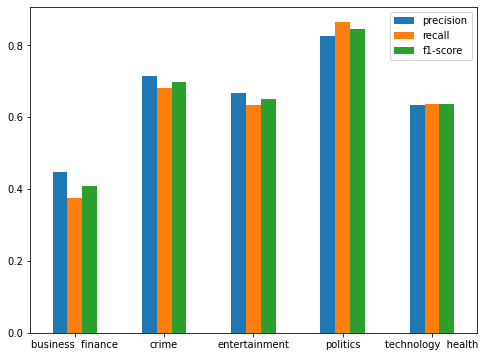

In [97]:
import matplotlib.pyplot as plt
import pandas as pd
gg= ['precision','recall','f1-score']
# a simple line plot
df21.iloc[0:5].plot(kind='bar',y= gg,figsize=(8,6),rot=0)

<AxesSubplot:>

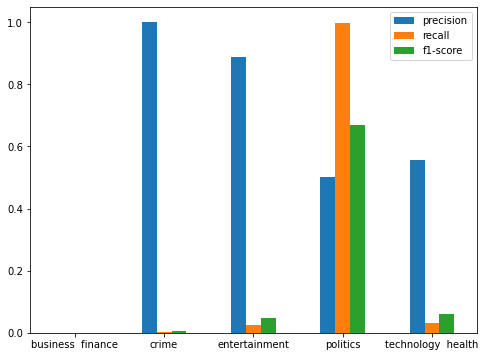

In [98]:
hh= ['precision','recall','f1-score']
# a simple line plot
df22.iloc[0:5].plot(kind='bar',y= hh,figsize=(8,6),rot=0)

<AxesSubplot:>

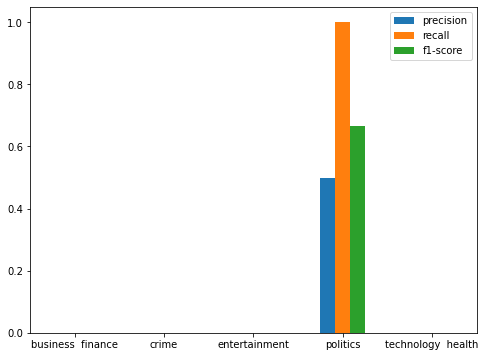

In [99]:
ii= ['precision','recall','f1-score']
# a simple line plot
df23.iloc[0:5].plot(kind='bar',y= ii,figsize=(8,6),rot=0)

In [100]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('jet')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            plt.xlim(-0.5, len(np.unique(y))-0.5)
    plt.ylim(len(np.unique(y))-0.5, -0.5)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

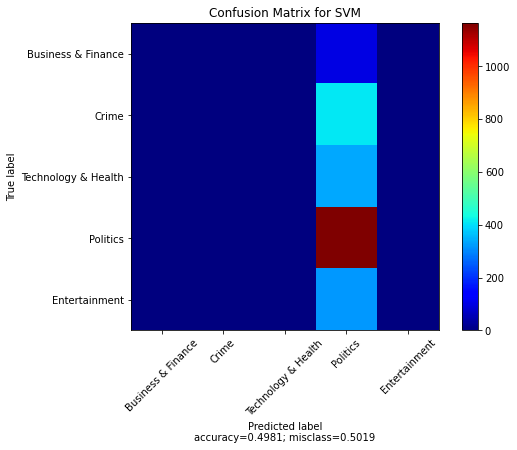

In [101]:
plot_confusion_matrix(cm           =t, 
                                    normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for SVM")

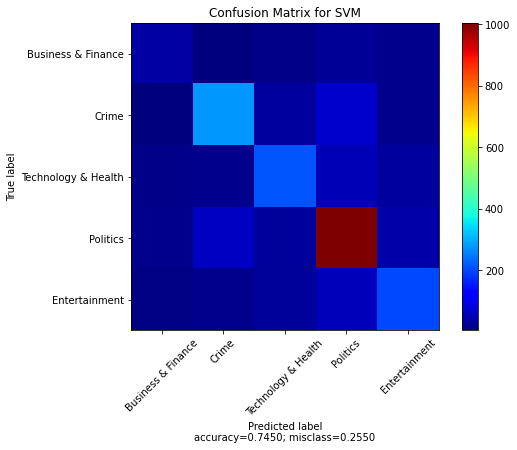

In [102]:
plot_confusion_matrix(cm           =q, 
                                    normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for SVM")

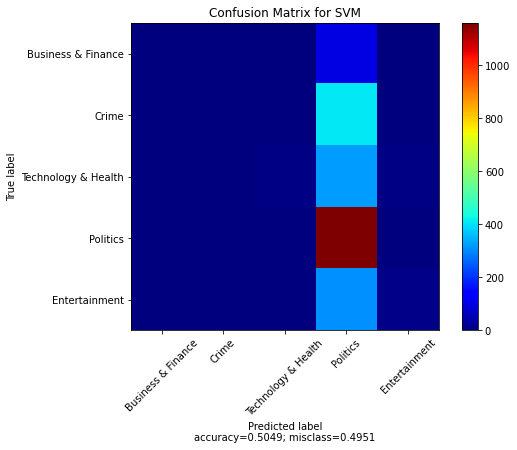

In [103]:
plot_confusion_matrix(cm           =s, 
                                    normalize    = False,
                                    target_names = ['Business & Finance', 'Crime', 'Technology & Health', 'Politics','Entertainment'],
                                    title        = "Confusion Matrix for SVM")